### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [53]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

# Install project dependencies

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.simplefilter("ignore")
%matplotlib inline


In [4]:
# Create a dataframe from the csv file
df=pd.read_csv('BankNote_Authentication.csv')
df.shape

(1372, 5)

In [5]:
# Create list of Dataframe columns 
cols = df.columns
cols = cols.tolist()

In [6]:
# Checking number of unique values in the dependent and independent variables of the dataframe
df.nunique()

variance    1338
skewness    1256
curtosis    1270
entropy     1156
class          2
dtype: int64

In [7]:
df.shape

(1372, 5)

In [8]:
# Checking for balance in our target since it'll greatly impact out model result
# From the result below, we can deduce that our target is quite balanced given that out of 1372 observations, 610 is positive and 762 is negative
data = df['class'].value_counts()
data

0    762
1    610
Name: class, dtype: int64

<AxesSubplot:>

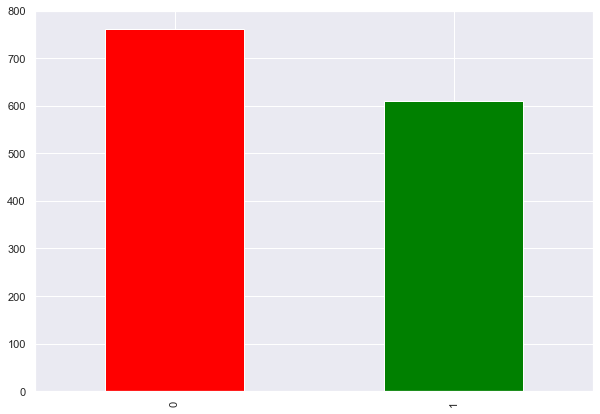

In [9]:
# Plotting different categories of the target value in a graph
data.plot(kind="bar", figsize=(10,7), color=['red', 'green'])

In [10]:
yes = df[df['class'] == 1]
yes.shape


(610, 5)

In [11]:
no = df[df['class'] != 1]
no.shape

(762, 5)

In [12]:
df.info()

# We can see that the data frame has 1372 entries and 5 columns.
# Also for each of the columns, the non-null count is 1372 which implies that no column contains null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
# Checking for duplicate value in the dataframe
dups = df.duplicated()
# report if there are any duplicates print(dups.any())
# list all duplicate rows print(df[dups])
dups.any()
df[dups].shape
# Result below shows 24 rows with duplicate values. This will affect the quality of our modl if we leave them. 

(24, 5)

In [14]:
# Create dataframe of duplicate values
df[dups]

,variance,skewness,curtosis,entropy,class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [15]:
# Let confirm the shape of our dataframe before dropping the duplicate values
df.shape

(1372, 5)

In [16]:
# delete duplicate rows df.drop_duplicates(inplace=True) print(df.shape) again 
df.drop_duplicates(inplace=True)
df.shape
# If you compare (1372, 5) that we got earlier to the result below, you'll notice we have dropped the duplicate values'

(1348, 5)

In [17]:
# Verify that no duplicates exists

df[dups]

,variance,skewness,curtosis,entropy,class


In [18]:
# Checking for balance in our target since it'll greatly impact out model result
# From the result below, we can deduce that our target is quite balanced given that out of 1348 observations, 610 is positive and 738 is negative
data = df['class'].value_counts()
data

0    738
1    610
Name: class, dtype: int64

<AxesSubplot:>

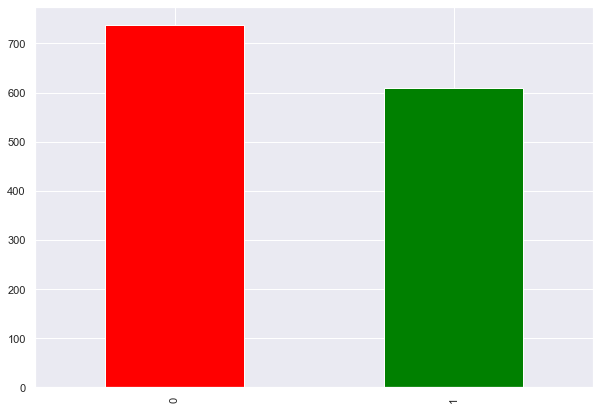

In [19]:
# Plotting different categories of the target value in a graph
data.plot(kind="bar", figsize=(10,7), color=['red', 'green'])

## Univariate Analysis of Continous Variables

This is the most basic form of the data analysis technique. When we want to understand the data contained by only one variable and don’t want to deal with the causes or effect relationships then a Univariate analysis technique is used.

In [20]:
num_df = df[['variance', 'skewness', 'curtosis', 'entropy']]
num_df.describe()

,variance,skewness,curtosis,entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


By using the describe function on the dataframe, we get the mean, std, min, max, 25th percentile, 50th percentile, and 75% percentile values of the columns in our dataframe.
We can see a trend in the minimum values of features which is <= 0.
Now we will plot histograms for columns which are continuous(all are continuous) to see the frequency distribution of values of columns.

<AxesSubplot:xlabel='variance', ylabel='Count'>

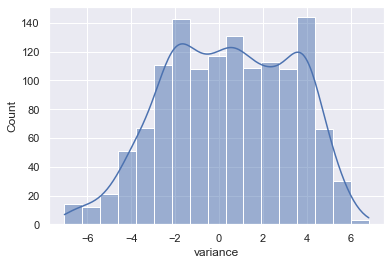

In [21]:
sns.histplot(num_df.variance,kde=True)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

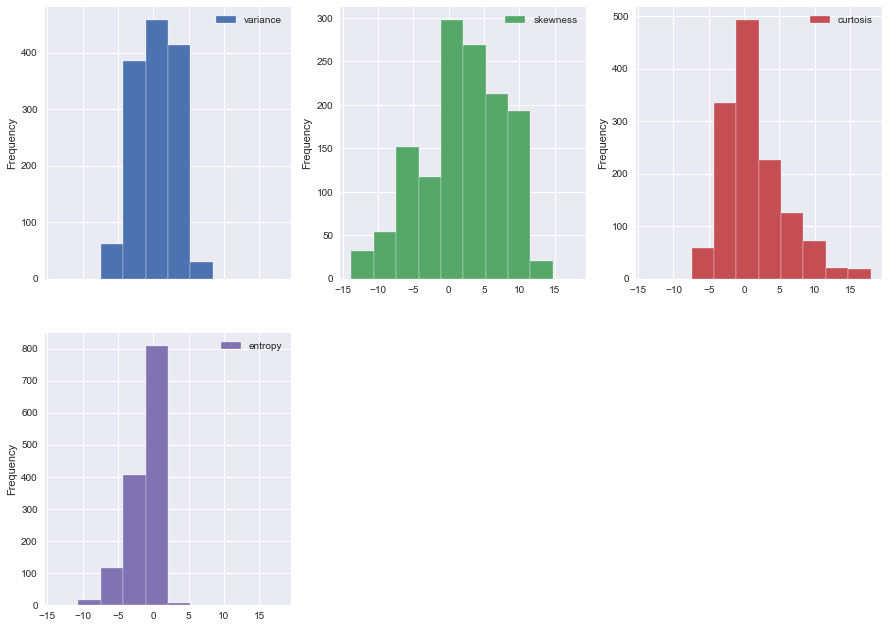

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
num_df.plot.hist(subplots=True, legend=True, layout=(2, 3), figsize=(15,11))

We can understand the distributions better by the disgram above. 

## Univariate Analysis of Categorical Variable(s)

<AxesSubplot:xlabel='class', ylabel='count'>

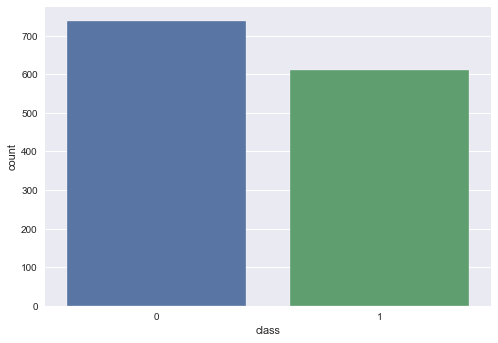

In [23]:
# plot count plot for the class column
sns.countplot(df['class'])

## Observations:

We have move negative cases compared positive cases. By % negative cases comprise of ~54% of the records while positive cases is ~45%
The difference between the positive and negative cases is 128 out of 1372 which comprises of ~9% of the data records

## Bivariate Analysis

The first step in performing bivariate analysis between continuous variables would be to calculate correlations between them. Use corr function to construct the correlation matrix.

In [24]:
# This function is used to find the pairwise correlation of all columns in the dataframe. 
# Any missing values are automatically excluded. For any non-numeric data type columns in the dataframe,
#  it is ignored. This function comes in handy while we doing the Feature Selection by observing the correlation 
# between features and target variable or between variables

df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


Among the things we need to look out for is how strongly variables correlate with each other.
In our dataset, we don’t see a very strong correlation between any two continuous variables, however in some it is possible to have continuous variables that are strongly correlated and the values of one might depend on others.

Let us use the line plots and scatterplots to see a relation between the continuous variables. 

In [25]:
#  This function shows the data type of each column.
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [26]:
# Checkingfor null/missing values in every column
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [27]:
df.isna().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [28]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [29]:
df.corr().transpose()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


<AxesSubplot:>

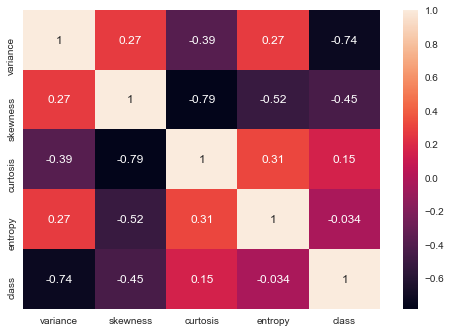

In [30]:
data_corr = df.corr().transpose()

sns.heatmap(data_corr, annot=True)

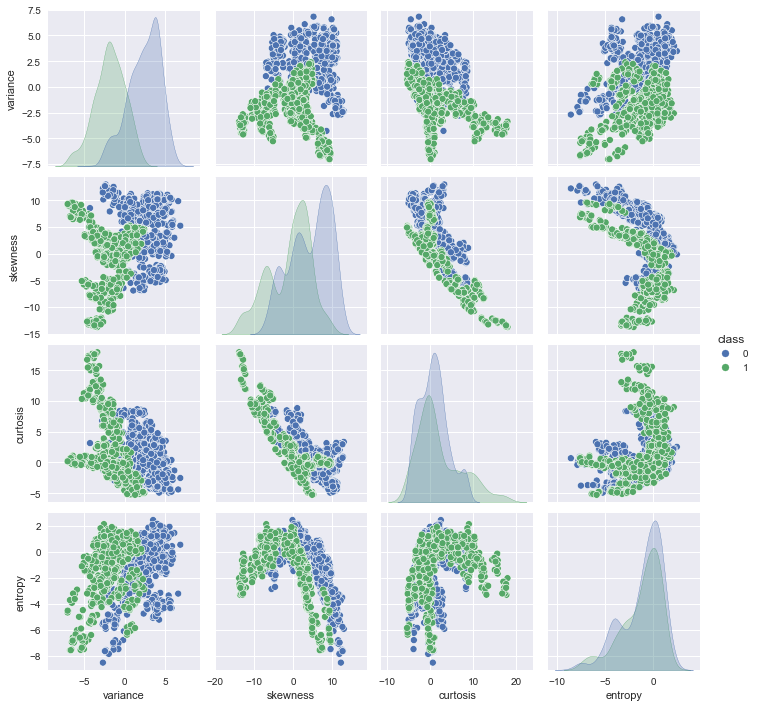

In [52]:
sns.pairplot(df, hue='class')

If we take a closer look at the produced figure, we can see that we have all of our variables shown along the y and x axis. Along the diagonal we have a histogram showing the distribution of each of the variables.

Instantly we have a single figure that provides a nice condensed summary of our dataset.

In [32]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [33]:
tk = [1,2,3,4,5]
tk[:3]
# slicing of array

[1, 2, 3]

In [34]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1348, dtype: int64

In [36]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [37]:
y.head(20)
y.unique()

array([0, 1])

In [38]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0, stratify=y)

# Notice that I set a random_state; this ensures that if I have to rerun my code, I’ll get the exact same train-test split, so my results won’t change. I wouldn’t want to spend all day trying to evaluate a model whose outputs change every time I need to restart my kernel!
# Another argument to note is the stratify=y This tells train_test_split to make sure that the training and test datasets contain examples of each class in the same proportions as in the original dataset. This is especially important in dataset with inbalanced classes. A random split could easily end up with all examples of the smallest class in the test set and none in the training set, and then the model would be unable to identify that class.

In [40]:
X_train.values

array([[ 1.296  ,  4.2855 , -4.8457 , -2.9013 ],
       [ 1.0607 ,  2.4542 ,  2.5188 , -0.17027],
       [ 3.1541 , -5.1711 ,  6.5991 ,  0.57455],
       ...,
       [-3.551  ,  1.8955 ,  0.1865 , -2.4409 ],
       [ 3.8962 , -4.7904 ,  3.3954 , -0.53751],
       [ 3.5829 ,  1.4423 ,  1.0219 ,  1.4008 ]])

In [41]:
X_test.head(10)

,variance,skewness,curtosis,entropy
863,0.20216,1.91820,-3.28280,-0.61768
186,3.25850,-4.46140,3.80240,-0.15087
886,-1.65140,-8.49850,9.11220,1.23790
766,-3.56810,-8.21300,10.08300,0.96765
548,1.85330,6.14580,1.01760,-2.04010
144,3.84810,10.15390,-3.85610,-4.22280
645,2.92330,6.04640,-0.11168,-0.58665
686,0.76163,5.82090,1.19590,-0.64613
1071,-2.53730,-6.95900,8.80540,1.52890
55,4.82650,0.80287,1.63710,1.18750


In [42]:
X_test.shape

(270, 4)

In [43]:
y_train.shape

(1078,)

In [44]:
y_test.shape

(270,)

In [57]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train.values,y_train.values)

RandomForestClassifier()

In [58]:
## Prediction
y_pred=classifier.predict(X_test.values)

## Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Accuracy Score

This score measures how many labels the model got right out of the total number of predictions. You can think of this as the percent of predictions that were correct

In [60]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [61]:
score

0.9925925925925926

You may get an impressive result above but remember that accuracy is not a great measure of classifier performance when the classes are imbalanced. We need more information to understand how well the model really performed. Did it perform equally well for each class? Were there any pairs of classes it found especially hard to distinguish? Let’s find out with a confusion matrix.

### Confusion Matrix

A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused

In the confusion matrices below, the rows represent the true labels and the columns represent predicted labels. Values on the diagonal represent the number (or percent, in a normalized confusion matrix) of times where the predicted label matches the true label. Values in the other cells represent instances where the classifier mislabeled an observation; the column tells us what the classifier predicted, and the row tells us what the right label was. This is a convenient way to spot areas where the model may need a little extra training

Scikit-Learn’s confusion_matrix() takes the true labels and the predictions and returns the confusion matrix as an array.

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[73,  1],
       [ 0, 61]])

This confusion matrix would be a lot easier to read if it had some labels and even a color scale to help us spot the biggest and smallest values. I’ll use a Seaborn heatmap() to do this.

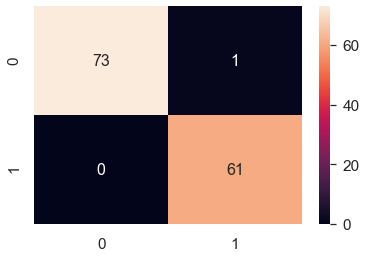

In [65]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


### Classification Report

To get even more insight into model performance, we should examine other metrics like precision, recall, and F1 score.


#### Precision 
This is the number of correctly-identified members of a class divided by all the times the model predicted that class. In the case of Class, the precision score would be the number of correctly-identified classes divided by the total number of times the classifier predicted the class,” rightly or wrongly.

#### Recall
This is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. For BankNotes, this would be the number of actual notes that the classifier correctly identified as such.

#### F1 score
This is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts (e.g., just identifying everything as a member of a large class).

In [68]:
# Let’s use Scikit-Learn’s classification_report() to view these metrics for our model.
# I wrapped it in a print() so that it will be nicely formatted.

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        61

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



Check out the metrics for class 1. Precision is high, meaning that the model was careful to avoid labeling things genuine note that aren’t original. The Recall and F1 score reflects this as well.

In [49]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [50]:
import numpy as np

In [51]:
classifier.predict([[2,3,4,1]])

array([0])